### **MA-INF4325 - Lab Data Science in Practice - Spatio Temporal Data Analytics**

Supervisor : PROF. DR. ELENA DEMIDOVA

Assistant  : ALISHIBA DSOUZA          
                      
UNIVERSITY OF BONN


**Lab Topic  is Prediction of Covid-19 Spread**



*   219 Countries and Territories around the world have reported a total of 122,435,351 confirmed cases of the coronavirus(COVID-19) and a death toll of 2,704,440 deaths.
*   The aim of this project is to predict the spread of this pandemic in the countries which are highly affected by this virus. And also identifying the factors affecting the spread like government policies, healthcare systems, etc in such difficult times.
*   We will work as per below guidelines to achieve the results:
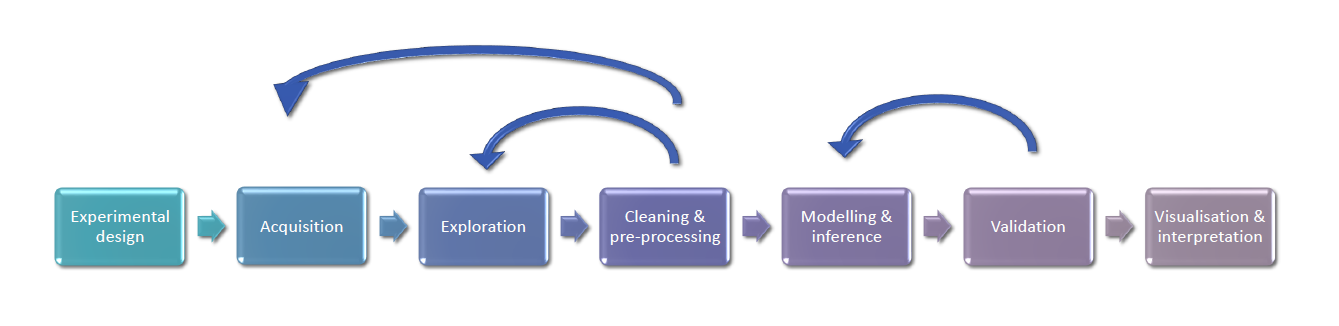






**SECTION 1 : DATA ACQUISITION AND PRE-PREOCESSING**

Pre-processing is a crucial step in Machine Learning project work, as the real-world dataset contains incorrect, inconsistent or even missing values.

So its very important that before proceeding with model building, our dataset should be clean and correct.

**STEPS INVOLVED IN PREPROCESSING**

1. Acquire the dataset
2. Import all the crucial libraries
3. Import the dataset
4. Identifying and handling incorrect or inconsistent values
5. Identifying and handling the missing values



**STEP 1** : **Acquire the Dataset** 

The dataset is obtained from below source. 

"https://github.com/GoogleCloudPlatform/covid-19-open-data"

This repository attempts to assemble the largest Covid-19 epidemiological database in addition to a powerful set of expansive covariates. It includes open, publicly sourced, licensed data relating to demographics, economy, epidemiology, geography, health, hospitalizations, mobility, government response, weather, and more.

The size of the  dataset is around 2GB and has more than 100 features.

**STEP 2 : Import all the crucial libraries**

In [ ]:
# IMPORTING LIBRARIES
import pandas as pd

# MATHEMATICS
import numpy as np

# VISUALIZATIONS
import matplotlib.pyplot as plt
import seaborn as sns

# MACHINE LEARNING
from sklearn import preprocessing

%matplotlib inline

In [ ]:
# To display all the available columns and rows in the output :
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

**STEP 3: Import and understand the dataset**




In [ ]:
# READING THE DATASET
data = pd.read_csv('Covid_dataset.csv')                                         
# You can also directly download the dataset from : "https://storage.googleapis.com/covid19-open-data/v2/main.csv"

data.drop(data.filter(regex="Unname"),axis=1, inplace=True)              # To drop a column named 'unnamed:0'

# BASIC INFORMATION ABOUT DATASET:
print('\n Dimensions of the Dataset:', data.shape)                       # No. of records(rows) * No. of features(columns)
print('\n First Few rows are: \n', data.head())                          # Shows what first few rows looks like
print('\n Features of the dataset are: \n', data.columns)                # Columns in the dataset


 Dimensions of the Dataset: (79781, 112)

 First Few rows are: 
                CD_KEY key        date wikidata  datacommons country_code  \
0  2020-01-01_Andorra  AD  2020-01-01     Q228  country/AND           AD   
1  2020-01-02_Andorra  AD  2020-01-02     Q228  country/AND           AD   
2  2020-01-03_Andorra  AD  2020-01-03     Q228  country/AND           AD   
3  2020-01-04_Andorra  AD  2020-01-04     Q228  country/AND           AD   
4  2020-01-05_Andorra  AD  2020-01-05     Q228  country/AND           AD   

  country_name  subregion1_code  subregion1_name  subregion2_code  \
0      Andorra              NaN              NaN              NaN   
1      Andorra              NaN              NaN              NaN   
2      Andorra              NaN              NaN              NaN   
3      Andorra              NaN              NaN              NaN   
4      Andorra              NaN              NaN              NaN   

   subregion2_name  locality_code  locality_name 3166-1-alpha-

**STEP 4: Identifying and handling incorrect, inconsistent or unnecessary values**

In [ ]:
print('\n Columns are:\n', data.columns)                                 # Name of columns(features)


 Columns are:
 Index(['CD_KEY', 'key', 'date', 'wikidata', 'datacommons', 'country_code',
       'country_name', 'subregion1_code', 'subregion1_name', 'subregion2_code',
       ...
       'average_temperature', 'minimum_temperature', 'maximum_temperature',
       'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object', length=112)



Columns **'3166-1-alpha-2' and '3166-1-alpha-3'** does not make any sense by their names.
So we will check the values of these columns.

We will check other column values as well like **'key', 'datacommons' and 'CD_KEY'**


In [ ]:
print(data[['3166-1-alpha-2', '3166-1-alpha-3']])                 # Looks like the values are matching with country codes       

# OTHER COLUMN VALUES LIKE-  'key','datacommons','CD_KEY'
print("\n Checking repeated values: \n \n",data[['date','country_name','country_code','key','datacommons','CD_KEY','3166-1-alpha-2', '3166-1-alpha-3']].head(10))

      3166-1-alpha-2 3166-1-alpha-3
0                 AD            AND
1                 AD            AND
2                 AD            AND
3                 AD            AND
4                 AD            AND
...              ...            ...
79776             ZW            ZWE
79777             ZW            ZWE
79778             ZW            ZWE
79779             ZW            ZWE
79780             ZW            ZWE

[79781 rows x 2 columns]

 Checking repeated values: 
 
          date country_name country_code key  datacommons              CD_KEY  \
0  2020-01-01      Andorra           AD  AD  country/AND  2020-01-01_Andorra   
1  2020-01-02      Andorra           AD  AD  country/AND  2020-01-02_Andorra   
2  2020-01-03      Andorra           AD  AD  country/AND  2020-01-03_Andorra   
3  2020-01-04      Andorra           AD  AD  country/AND  2020-01-04_Andorra   
4  2020-01-05      Andorra           AD  AD  country/AND  2020-01-05_Andorra   
5  2020-01-06      Andorra    


Columns having repeated values : 

1.   **"country_name" - "CD_KEY"**
2.   **"key","country_code" - "3166-1-alpha-2"**
3.   **"datacommons" - "3166-1-alpha-3"**


So we will only keep **"date", "country_name"** column and We do not require other columns as those are repeated values


In [ ]:
# DROPPING INCORRECT/INCONSISTENT COLUMNS FROM DATASET:
data.drop(columns=['key','country_code','datacommons','CD_KEY','3166-1-alpha-2', '3166-1-alpha-3'], inplace = True, axis = 1)
print('\n Shape of the dataset after removing incorrect/inconsistent columns: ',data.shape)


 Shape of the dataset after removing incorrect/inconsistent columns:  (79781, 106)


In [ ]:
# CHECKING UNNECESSARY/IRRELEVANT COLUMNS : 
print(data.columns)
print(data[['noaa_station','noaa_distance','wikidata','aggregation_level']])


Index(['date', 'wikidata', 'country_name', 'subregion1_code',
       'subregion1_name', 'subregion2_code', 'subregion2_name',
       'locality_code', 'locality_name', 'aggregation_level',
       ...
       'average_temperature', 'minimum_temperature', 'maximum_temperature',
       'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object', length=106)
       noaa_station  noaa_distance wikidata  aggregation_level
0      8.117100e+09      39.866801     Q228                  0
1      8.117100e+09      39.866801     Q228                  0
2      8.117100e+09      39.866801     Q228                  0
3      8.117100e+09      39.866801     Q228                  0
4      8.117100e+09      39.866801     Q228                  0
...             ...            ...      ...                ...
79776           NaN            NaN     Q954                  0
79777           NaN            NaN     Q954                  0
79778          

In [ ]:
# DROPPING UNNECESSARY/IRRELEVANT COLUMNS :
unnecessary_info_cols = ['wikidata','aggregation_level','noaa_station','noaa_distance']
data.drop(columns = unnecessary_info_cols, axis = 1, inplace = True)

print(data.shape)

(79781, 102)


In [ ]:
print(data.country_name.unique())                 # Checking names of the countries for the correctness:

['Andorra' 'United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda'
 'Anguilla' 'Albania' 'Armenia' 'Netherlands Antilles' 'Angola'
 'Antarctica' 'Argentina' 'American Samoa' 'Austria' 'Australia' 'Aruba'
 'Azerbaijan' 'Bosnia and Herzegovina' 'Barbados' 'Bangladesh' 'Belgium'
 'Burkina Faso' 'Bulgaria' 'Bahrain' 'Burundi' 'Benin' 'Bermuda' 'Brunei'
 'Bolivia' 'Caribbean Netherlands' 'Brazil' 'Bahamas' 'Bhutan'
 'Bouvet Island' 'Botswana' 'Belarus' 'Belize' 'Canada' 'Cocos Islands'
 'Democratic Republic of the Congo' 'Central African Republic'
 'Republic of the Congo' 'Switzerland' 'Ivory Coast' 'Cook Islands'
 'Chile' 'Cameroon' 'China' 'Colombia' 'Costa Rica' 'Cuba' 'Cape Verde'
 'Curaçao' 'Christmas Island' 'Cyprus' 'Czech Republic' 'Germany'
 'Djibouti' 'Denmark' 'Dominica' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Estonia' 'Egypt' 'Western Sahara' 'Eritrea' 'Spain' 'Ethiopia' 'Finland'
 'Fiji' 'Falkland Islands' 'Micronesia' 'Faroe Islands' 'France' 'Gabon'
 'United Kingdom' 'G

**STEP 5 : Identifying and handling the missing values**

If multiple features/columns are missing for any particular record/row. We will drop such a row.

If multiple records/rows are missing for any particular column/feature. We will drop that column/feature.

In [ ]:
# SOME INFORMATION ON THE DATA FOR EACH COUNTRY
print(data['country_name'].value_counts())               # So this shows that data is collected for 323 unique days for each country

Botswana                                        323
Algeria                                         323
Panama                                          323
Réunion                                         323
Faroe Islands                                   323
Antarctica                                      323
Saint Vincent and the Grenadines                323
Ghana                                           323
Germany                                         323
Niue                                            323
Morocco                                         323
Wallis and Futuna                               323
Guernsey                                        323
Dominican Republic                              323
India                                           323
Zimbabwe                                        323
Northern Mariana Islands                        323
Macau                                           323
Sweden                                          323
São Tomé and

In [ ]:
# CHECKING MISSING VALUES FOR DATASET
print(data.isnull().sum())

percent_missing_data = data.isnull().sum() * 100 / len(data)
print('\n Percentage of missing data for each feature \n', percent_missing_data)

# Checking for columns that has more than 60% missing data
sixtyPercentMissingData = percent_missing_data[percent_missing_data > 60.0] 
columns_to_remove = list(sixtyPercentMissingData.index)
print('\n Columns with more than 60% missing data are:\n', sixtyPercentMissingData)
print('\n No. of columns with more than 60% missing data:  ', len(columns_to_remove))

date                                      0
country_name                              0
subregion1_code                       79781
subregion1_name                       79781
subregion2_code                       79781
subregion2_name                       79781
locality_code                         79781
locality_name                         79781
new_confirmed                          5355
new_deceased                           5358
new_recovered                         75885
new_tested                            57355
total_confirmed                        5353
total_deceased                         5357
total_recovered                       76043
total_tested                          57124
new_hospitalized                      77841
total_hospitalized                    77849
current_hospitalized                  78301
new_intensive_care                    78795
total_intensive_care                  78777
current_intensive_care                78197
new_ventilator                  

Theoretically columns/features having more than 25-30% of missing data should be removed. 

But practically its not feasible as that column or feature can be crucial while doing the prediction. 

So we will look at category of columns together for missing values.

In [ ]:
'''
There are 22 features having more than 60% of the data missing. 
And percentage of data missing ranges from 70% to 100%. 

We will go ahead and remove these columns.
'''
data = data.drop(columns=columns_to_remove, axis=1)             # Dropping the columns that has more than 60% missing data
print('\n Shape of the reduced data:',data.shape)


 Shape of the reduced data: (79781, 80)


In [ ]:
# WE WANT TO FIND THE RECORDS(COUNTRIES) WITH MOST OF THE MISSING VALUES FOR FEATURES - RECOVERED, CONFIMED AND DEATHS 

missing_data_confirmed = data[data.Confirmed.isnull()]
missing_data_recovered = data[data.Recovered.isnull()]
missing_data_deaths = data[data.Deaths.isnull()]

print('\n Records for which Confirmed cases are missing', missing_data_confirmed.shape)    
# print(missing_data_recovered.shape, missing_data_deaths.shape)   
# print(missing_data_confirmed[['country_name','Recovered']])

countries_missing_data = missing_data_confirmed.groupby(['country_name']).count()['date']
print('\n Countries and number of missing data days', countries_missing_data)

missing_data_count = countries_missing_data.to_list()
countries = list(countries_missing_data.index)
dict_missing_countries = dict(zip(countries,missing_data_count))
print('\n Countries and their missing data count(no. of days for which the data is missing)\n ',dict_missing_countries)

countries_to_drop = [k for k, v in dict_missing_countries.items() if v > 90]
# print(countries_to_drop)

print('\n Number of Countries with more than 3 months of missing data:',len(countries_to_drop))
print('\n Countries with more than 3 months of missing the data:',countries_to_drop)


 Records for which Confirmed cases are missing (36635, 80)

 Countries and number of missing data days country_name
Afghanistan                                      69
Albania                                          83
Algeria                                          70
American Samoa                                  323
Andorra                                          76
Angola                                           93
Anguilla                                        323
Antarctica                                      323
Antigua and Barbuda                              86
Argentina                                        77
Armenia                                          75
Aruba                                           316
Australia                                        39
Austria                                          70
Azerbaijan                                       74
Bahamas                                          95
Bahrain                                          69

In [ ]:
manualy_noted_countries = ['French Southern Territories','Yemen','Cameroon','Venezuela','Uzbekistan','British Virgin Islands','Somalia','Puerto Rico',
                 'Curaçao','Azerbaijan','Jersey','Eritrea','United States Minor Outlying Islands','Macau','French Guiana',
                 'Nauru','Swaziland','Palau','Sierra Leone','Heard Island and McDonald Islands','Kazakhstan','Guernsey',
                 'Samoa','Kosovo','Montenegro','Wallis and Futuna','Democratic Republic of the Congo','Antigua and Barbuda',
                 'Malta','Equatorial Guinea','Georgia','Christmas Island','Kiribati','Bermuda','Chad','Comoros','Central African Republic',
                 'Taiwan','Antarctica','Cocos Islands','United States Virgin Islands','East Timor','Saint Helena',
                 'Turks and Caicos Islands','Saint Kitts and Nevis','Malawi','French Polynesia','Martinique','Cape Verde', 
                 'Albania','Caribbean Netherlands','British Indian Ocean Territory','Saint Vincent and the Grenadines','Liechtenstein',
                 'Tajikistan','Lesotho','Marshall Islands','Greenland','Andorra','Zimbabwe','Solomon Islands','Cambodia','Cayman Islands',
                 'Hong Kong','Seychelles','Bouvet Island','Niue','Madagascar','Ukraine','Western Sahara','Isle of Man','Mayotte',
                 'San Marino','Grenada','Micronesia','Svalbard and Jan Mayen','Faroe Islands','Syria','Maldives','Bahamas','Dominica',
                 'Republic of the Congo','Mauritania','Northern Mariana Islands','Saint Lucia','Armenia','Sint Maarten','Niger',
                 'Gaza Strip','Montserrat','Tokelau','Anguilla','Cook Islands','Monaco','Falkland Islands','New Caledonia',
                 'Zambia','Vatican City','São Tomé and Príncipe','Djibouti','Hungary','Ivory Coast','Libya','Tuvalu','Vanuatu',
                 'South Sudan','South Georgia and the South Sandwich Islands','Gibraltar','North Korea','Myanmar','Papua New Guinea',
                 'Netherlands Antilles','Norfolk Island','Guam','Kyrgyzstan','Guinea-Bissau','Tonga','Sudan','Pitcairn Islands',
                 'American Samoa','Aruba','Réunion','Turkmenistan','Palestine','Macedonia']

extra_countries = list(set(manualy_noted_countries) - set(countries_to_drop))
# print(len(extra_countries))

countries_to_drop.extend(extra_countries)
print('No. of countries to drop',len(countries_to_drop))

# DROPPING THE ROWS/RECORDS WITH MOST OF THE MISSING DATA
data = data.drop(index=data[data['country_name'].isin(countries_to_drop)].index)
print('\n Shape of the data after removing countries for which many records are missing',data.shape)

No. of countries to drop 138

 Shape of the data after removing countries for which many records are missing (35207, 80)


In [ ]:
# WE ARE AGAIN  CHECKING FOR NULL VALUES FOR REMAINING COLUMNS:
'''
Data is missing for multiple features for starting few days, so we will consider the data from Month of Feb
'''

# print(data.shape)
# percent_missing_data = data.isnull().sum() * 100 / len(data)
# print('\n Percentage of missing data for each feature \n', percent_missing_data)

data = data[((data.date>= '2020-02-15') & (data.date <= '2021-01-07'))]
percent_missing_data = data.isnull().sum() * 100 / len(data)

print('\n Percentage of missing data for each feature after month of Feb \n', percent_missing_data)
# print(data.shape)



 Percentage of missing data for each feature after month of Feb 
 date                                   0.000000
country_name                           0.000000
new_confirmed                          1.013134
new_deceased                           1.023035
total_confirmed                        1.013134
total_deceased                         1.023035
population                             0.000000
population_male                        0.000000
population_female                      0.000000
rural_population                       0.000000
urban_population                       0.000000
largest_city_population                8.256881
clustered_population                  22.935780
population_density                     0.000000
human_development_index                0.917431
population_age_00_09                   0.000000
population_age_10_19                   0.000000
population_age_20_29                   0.000000
population_age_30_39                   0.000000
population_age_40_49 

We can see below that there is no relation for **'Confirmed', 'Recovered' and 'Deaths'** columns with any other related (**'new_confirmed', 'new_deceased',  'total_confirmed',  'total_deceased'**) columns.
The values does not add up. There are irrgularitites in these values. So we will drop these incorrect values.

However there is a relation between **"new_confirmed to total_confirmed" and  "new_deceased to total_deceased"**. 
But we do not have information about **"Recovered" cases and "newly recovered" cases**.


In [ ]:
# CHECKING THE VALUES FOR "CONFIRMED", "RECOVERED" AND "DEATH" CASES
print('Columns in the dataset are : \n',data.columns)
print('\n Relation between above mentioned columns: \n ')
print(data[['new_confirmed', 'new_deceased','total_confirmed', 'total_deceased', 'Confirmed', 'Recovered', 'Deaths']].tail(50))

Columns in the dataset are : 
 Index(['date', 'country_name', 'new_confirmed', 'new_deceased',
       'total_confirmed', 'total_deceased', 'population', 'population_male',
       'population_female', 'rural_population', 'urban_population',
       'largest_city_population', 'clustered_population', 'population_density',
       'human_development_index', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_89', 'population_age_90_99',
       'population_age_80_and_older', 'gdp', 'gdp_per_capita',
       'human_capital_index', 'open_street_maps', 'latitude', 'longitude',
       'area', 'rural_area', 'urban_area', 'life_expectancy',
       'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
       'adult_male_mortality_rate', 'adult_female_mortality_rate',
       'pollution_mortality_rate', 'comor

We will drop these columns as some of the values does not addup.

**And we will import these features from JHC(Johns Hopkins CSSE)**

COVID19 Daily Updates. This dataset is a curated version of 2019 Novel
Coronavirus COVID 19 (2019 nCoV) Data Repository by Johns Hopkins CSSE
https://www.kaggle.com/gpreda/coronavirus-2019ncov

In [ ]:
# DROPPING COLUMNS SUCH AS - 'Confirmed', 'Recovered', 'Deaths', 'new_confirmed', 'new_deceased','total_confirmed', 'total_deceased'
data.drop(columns=['Confirmed', 'Recovered', 'Deaths', 'new_confirmed', 'new_deceased','total_confirmed', 'total_deceased'], axis=1, inplace = True)
print('Shape of the data after removing above columns\n',data.shape)

Shape of the data after removing above columns
 (30302, 73)


Looking at features : **"clustered_population" and "largest_city_population"** for null values:

In [ ]:
print(' \n Features "clustered_population" and "largest_city_population" are missing for below countries respectively: ')
print("\nclustered_population - ",data[(data.largest_city_population.isnull())].country_name.unique())

print("\nlargest_city_population - ",data[(data.clustered_population.isnull())].country_name.unique())

 
 Features "clustered_population" and "largest_city_population" are missing for below countries respectively: 

clustered_population -  ['Barbados' 'Brunei' 'Bhutan' 'Cyprus' 'Guyana' 'Iceland' 'Luxembourg'
 'Slovenia' 'Suriname']

largest_city_population -  ['Bosnia and Herzegovina' 'Barbados' 'Bahrain' 'Benin' 'Brunei' 'Bhutan'
 'Cyprus' 'Estonia' 'Gabon' 'Gambia' 'Guyana' 'Croatia' 'Iceland'
 'Jamaica' 'Sri Lanka' 'Lithuania' 'Luxembourg' 'Latvia' 'Moldova'
 'Namibia' 'Qatar' 'Slovenia' 'Slovakia' 'Suriname' 'Trinidad and Tobago']


Looking at features : **"human_development_index" and "human_capital_index"** for null values:

In [ ]:
print(' \n Features "human_development_index" and "human_capital_index" are missing for below countries:')
print("\n human_development_index - ",data[(data.human_development_index.isnull())].country_name.unique())

# Ireland's HDI value for 2019 is 0.955
# So we will fill this above value in plave of NaN values.
data['human_development_index'].fillna(value = 0.955, inplace = True)

print("\n human_capital_index - ",data[(data.human_capital_index.isnull())].country_name.unique())

 
 Features "human_development_index" and "human_capital_index" are missing for below countries:

 human_development_index -  ['Ireland']

 human_capital_index -  ['Barbados' 'Brunei' 'Bolivia' 'Bhutan' 'Belarus' 'Cuba' 'Suriname']


Looking at features : **"rural_area" and "urban_area"** for null values:

In [ ]:
print(' \n Features "rural_area" and "urban_area" are missing for below countries:')
print("\n rural_area - ", data[(data.rural_area.isnull())].country_name.unique()) 
print("\n urban_area - ", data[(data.urban_area.isnull())].country_name.unique()) 

 
 Features "rural_area" and "urban_area" are missing for below countries:

 rural_area -  ['Afghanistan' 'Austria' 'Burkina Faso' 'Bolivia' 'Bhutan'
 'Czech Republic' 'Mongolia' 'Nepal' 'Paraguay' 'Serbia' 'Rwanda'
 'Slovakia']

 urban_area -  ['Afghanistan' 'Austria' 'Burkina Faso' 'Bolivia' 'Bhutan'
 'Czech Republic' 'Mongolia' 'Nepal' 'Paraguay' 'Serbia' 'Rwanda'
 'Slovakia']


Looking at features : **"smoking_prevalence","adult_male_mortality_rate" and "adult_female_mortality_rate"** for null values:

In [ ]:
print(' \n Features "smoking_prevalence", "adult_female_mortality_rate" and "adult_male_mortality_rate" are missing for below countries:')
print("\n smoking_prevalence - ", data[(data.smoking_prevalence.isnull())].country_name.unique()) 
print("\n adult_male_mortality_rate -", data[(data.adult_male_mortality_rate.isnull())].country_name.unique()) 
print("\n adult_female_mortality_rate -", data[(data.adult_female_mortality_rate.isnull())].country_name.unique())

 
 Features "smoking_prevalence", "adult_female_mortality_rate" and "adult_male_mortality_rate" are missing for below countries:

 smoking_prevalence -  ['Afghanistan' 'Bolivia' 'Bhutan' 'Gabon' 'Guinea' 'Guatemala' 'Guyana'
 'Iraq' 'Jordan' 'Trinidad and Tobago']

 adult_male_mortality_rate - ['Italy' 'New Zealand' 'Russia']

 adult_female_mortality_rate - ['Italy' 'New Zealand' 'Russia']



So instead of dropping records for above features, we will drop these columns as we do not require them in our prediction.
**'largest_city_population', 'clustered_population','human_capital_index'**,  **'rural_area', 'urban_area',
'smoking_prevalence', 'adult_male_mortality_rate', 'adult_female_mortality_rate'**


In [ ]:
columns_to_drop = ['largest_city_population', 'clustered_population','human_capital_index', 'rural_area', 'urban_area',
'smoking_prevalence', 'adult_male_mortality_rate', 'adult_female_mortality_rate']

#DROPPING COLUMNS
data.drop(columns=columns_to_drop, inplace=True)
print('\n Shape of the data',data.shape)

#AGAIN CHECKING MISSING DATA PERCENTAGE AFTER REMOVING COLUMNS AND ROWS
percent_missing_data = data.isnull().sum() * 100 / len(data)
print('\n Percent Missing Data',percent_missing_data)



 Shape of the data (30302, 65)

 Percent Missing Data date                                   0.000000
country_name                           0.000000
population                             0.000000
population_male                        0.000000
population_female                      0.000000
rural_population                       0.000000
urban_population                       0.000000
population_density                     0.000000
human_development_index                0.000000
population_age_00_09                   0.000000
population_age_10_19                   0.000000
population_age_20_29                   0.000000
population_age_30_39                   0.000000
population_age_40_49                   0.000000
population_age_50_59                   0.000000
population_age_60_69                   0.000000
population_age_70_79                   0.000000
population_age_80_89                   0.000000
population_age_90_99                   0.000000
population_age_80_and_older      

Now we will check for further missing features and their records. We still have some missing data for **mobility, weather related features**

In [ ]:
# Only checking the columns that has missing data :
index_cols = percent_missing_data[percent_missing_data > 0].index
print(index_cols)

Index(['mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
       'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential', 'school_closing', 'workplace_closing',
       'cancel_public_events', 'restrictions_on_gatherings',
       'public_transport_closing', 'stay_at_home_requirements',
       'restrictions_on_internal_movement', 'international_travel_controls',
       'income_support', 'debt_relief', 'fiscal_measures',
       'international_support', 'public_information_campaigns',
       'testing_policy', 'contact_tracing',
       'emergency_investment_in_healthcare', 'investment_in_vaccines',
       'stringency_index', 'average_temperature', 'minimum_temperature',
       'maximum_temperature', 'rainfall', 'dew_point', 'relative_humidity'],
      dtype='object')


**STATISTICAL IMPUTATIONS**

We will use Statistical Imputations to fill the NaN values of these remaining features.

1. **Weather related features** : We will use the countrywise
mean for 'average_temperature', 'minimum_temperature','maximum_temperature', 'rainfall', 'dew_point', 'relative_humidity' features.

2. **Govt. Policy related features** : We will use the countrywise mean value 

3. **Mobility related features**: We will use the countrywise mean value

In [ ]:
weather_related_features = ['average_temperature', 'minimum_temperature','maximum_temperature', 'rainfall', 'dew_point', 'relative_humidity']
for i in weather_related_features:
  # print(i)
  data[i] = data[i].fillna(data.groupby('country_name')[i].transform('mean'))

In [ ]:
govt_policy_features = ['school_closing', 'workplace_closing','cancel_public_events', 'restrictions_on_gatherings',
                        'public_transport_closing', 'stay_at_home_requirements','restrictions_on_internal_movement', 
                        'international_travel_controls','income_support', 'debt_relief', 'fiscal_measures',
                        'international_support', 'public_information_campaigns','testing_policy', 'contact_tracing',
                        'emergency_investment_in_healthcare', 'investment_in_vaccines','stringency_index']
for i in govt_policy_features:
  # print(i)
  data[i] = data[i].fillna(data.groupby('country_name')[i].transform('mean'))

In [ ]:
mobility_related_features = ['mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
                              'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces','mobility_residential']

print('\n All Mobility data is missing for below countries for all the days:')
print(data[(data.mobility_retail_and_recreation.isnull())].country_name.unique())
# print(data[(data.mobility_grocery_and_pharmacy.isnull())].country_name.unique())
# print(data[(data.mobility_parks.isnull())].country_name.unique())
# print(data[(data.mobility_transit_stations.isnull())].country_name.unique())
# print(data[(data.mobility_workplaces.isnull())].country_name.unique())
# print(data[(data.mobility_residential.isnull())].country_name.unique())

for i in mobility_related_features:
  # print(i)
  data[i] = data[i].fillna(data.groupby('country_name')[i].transform('mean'))


 All Mobility data is missing for below countries for all the days:
['United Arab Emirates' 'Afghanistan' 'Argentina' 'Austria' 'Australia'
 'Bosnia and Herzegovina' 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso'
 'Bulgaria' 'Bahrain' 'Benin' 'Brunei' 'Bolivia' 'Brazil' 'Bhutan'
 'Belarus' 'Canada' 'Switzerland' 'Chile' 'China' 'Colombia' 'Costa Rica'
 'Cuba' 'Cyprus' 'Czech Republic' 'Germany' 'Denmark' 'Dominican Republic'
 'Algeria' 'Ecuador' 'Estonia' 'Egypt' 'Spain' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'United Kingdom' 'Ghana' 'Gambia' 'Guinea' 'Greece'
 'Guatemala' 'Guyana' 'Honduras' 'Croatia' 'Indonesia' 'Ireland' 'Israel'
 'India' 'Iraq' 'Iran' 'Iceland' 'Italy' 'Jamaica' 'Jordan' 'Japan'
 'Kenya' 'South Korea' 'Kuwait' 'Lebanon' 'Sri Lanka' 'Liberia'
 'Lithuania' 'Luxembourg' 'Latvia' 'Morocco' 'Moldova' 'Mongolia' 'Mexico'
 'Malaysia' 'Namibia' 'Nigeria' 'Netherlands' 'Norway' 'Nepal'
 'New Zealand' 'Oman' 'Panama' 'Peru' 'Philippines' 'Pakistan' 'Poland'
 'Portugal' 'P

In [ ]:
percent_missing_data = data.isnull().sum() * 100 / len(data)
print('\n Percent Missing Data',percent_missing_data)


 Percent Missing Data date                                   0.000000
country_name                           0.000000
population                             0.000000
population_male                        0.000000
population_female                      0.000000
rural_population                       0.000000
urban_population                       0.000000
population_density                     0.000000
human_development_index                0.000000
population_age_00_09                   0.000000
population_age_10_19                   0.000000
population_age_20_29                   0.000000
population_age_30_39                   0.000000
population_age_40_49                   0.000000
population_age_50_59                   0.000000
population_age_60_69                   0.000000
population_age_70_79                   0.000000
population_age_80_89                   0.000000
population_age_90_99                   0.000000
population_age_80_and_older            0.000000
gdp              

We still have some missing data for mobility related features. We will check into that further.

In [ ]:
# We will check for the countries having missing mobility data
print(data[(data.mobility_retail_and_recreation.isnull())].country_name.unique())
print(data[(data.mobility_grocery_and_pharmacy.isnull())].country_name.unique())
print(data[(data.mobility_parks.isnull())].country_name.unique())
print(data[(data.mobility_transit_stations.isnull())].country_name.unique())
print(data[(data.mobility_workplaces.isnull())].country_name.unique())
print(data[(data.mobility_residential.isnull())].country_name.unique())

['Brunei' 'Bhutan' 'China' 'Cuba' 'Cyprus' 'Algeria' 'Ethiopia' 'Gambia'
 'Guinea' 'Guyana' 'Iran' 'Iceland' 'Liberia' 'Suriname' 'Tunisia']
['Brunei' 'Bhutan' 'China' 'Cuba' 'Cyprus' 'Algeria' 'Ethiopia' 'Gambia'
 'Guinea' 'Guyana' 'Iran' 'Iceland' 'Liberia' 'Suriname' 'Tunisia']
['Brunei' 'Bhutan' 'China' 'Cuba' 'Cyprus' 'Algeria' 'Ethiopia' 'Gambia'
 'Guinea' 'Guyana' 'Iran' 'Iceland' 'Liberia' 'Suriname' 'Tunisia']
['Brunei' 'Bhutan' 'China' 'Cuba' 'Cyprus' 'Algeria' 'Ethiopia' 'Gambia'
 'Guinea' 'Guyana' 'Iran' 'Iceland' 'Liberia' 'Suriname' 'Tunisia']
['Brunei' 'Bhutan' 'China' 'Cuba' 'Cyprus' 'Algeria' 'Ethiopia' 'Gambia'
 'Guinea' 'Guyana' 'Iran' 'Iceland' 'Liberia' 'Suriname' 'Tunisia']
['Brunei' 'Bhutan' 'China' 'Cuba' 'Cyprus' 'Algeria' 'Ethiopia' 'Gambia'
 'Guinea' 'Guyana' 'Iran' 'Iceland' 'Liberia' 'Suriname' 'Tunisia']


**All mobility related data is missing for above countries for all the days. So we can not use any imputation method.** 

So, We will remove these countries. 

In [ ]:
mobility_country = data[(data.mobility_retail_and_recreation.isnull())].country_name.unique() 
data.drop(data[data['country_name'].isin(mobility_country)].index, inplace = True)

**Finally Checking missing values again :**


In [ ]:
percent_missing_data = data.isnull().sum() * 100 / len(data)
print('\n Percent Missing Data',percent_missing_data)
print('\n Final Shape of the data after removing all missing data',data.shape)


 Percent Missing Data date                                  0.0
country_name                          0.0
population                            0.0
population_male                       0.0
population_female                     0.0
rural_population                      0.0
urban_population                      0.0
population_density                    0.0
human_development_index               0.0
population_age_00_09                  0.0
population_age_10_19                  0.0
population_age_20_29                  0.0
population_age_30_39                  0.0
population_age_40_49                  0.0
population_age_50_59                  0.0
population_age_60_69                  0.0
population_age_70_79                  0.0
population_age_80_89                  0.0
population_age_90_99                  0.0
population_age_80_and_older           0.0
gdp                                   0.0
gdp_per_capita                        0.0
open_street_maps                      0.0
latitude   


Now we have a dataframe which do not have null values. 
However we do not have the important features like **"Recovered Cases", "Confirmed Cases" and "Deaths"**. 

The integration part was done by rohil as I was having memory issue on the system.

Also on google colab the session was getting crashed. So for EDA part we will be using the new/updated dataset.


In [ ]:
# Code for integration part for features "Recovered Cases", "Confirmed Cases" and "Deaths" from JHC.
'''
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

def meltData(df,name):
    melted = pd.melt(df,id_vars=['Province/State','Country/Region','Lat','Long'],value_vars=confirmed.columns[4:],
                     var_name='Date',value_name=name)
    return melted

melt_confirmed = meltData(confirmed,'Confirmed')
melt_deaths = meltData(deaths,'Deaths')
melt_recovered = meltData(recovered,'Recovered')

def merge(df1,df2):
    merged = pd.merge(left=df1,right=df2, how='inner',
                      on=['Country/Region','Province/State', 'Date', 'Lat', 'Long'])
    return merged

covid19 = merge(merge(melt_confirmed,melt_deaths),melt_recovered)

covid19.rename(columns={'Country/Region': 'country_name', 'Date': 'date'}, inplace=True)
print(covid19.shape)


covid19["country_name"].replace({"US": "United States of America"}, inplace=True)
covid19["country_name"].replace({"Czechia": "Czech Republic"}, inplace=True)
covid19["country_name"].replace({"Korea, South": "South Korea"}, inplace=True)


covid19 = covid19.groupby(['country_name','date']).sum()
covid19 = covid19.reset_index()

print(covid19.shape)
print(len(covid19.country_name.unique()))
print(len(covid19.date.unique()))
print(covid19.isnull().sum())


print("number of columns in df_final dataset obtained from google api " , len(data.columns))
print("number of columns in covid19 dataset obtainedy directl from john hopkins ", len(covid19.columns))


print(covid19.columns)
print(data.columns)


covid19.date = pd.to_datetime(covid19.date,infer_datetime_format = True)
data.date = pd.to_datetime(data.date,infer_datetime_format = True)


final_merged = pd.merge(left=data,right=covid19, how='inner',on=[ 'country_name', 'date'])
print(final_merged.shape)
print(final_merged.columns)
print(final_merged.isnull().sum())

dataset = final_merged.drop(['Lat', 'Long'], axis=1)

print(dataset.shape)
print(len(dataset.country_name.unique()))
print(len(dataset.date.unique()))


# Now to obtain new_recoverd we must subtract todays total count from yesterday
# For this we create a new column 'Recovered Shifted' with values shifted p by 1 

dataset['Confirmed_shifted'] = dataset.groupby(['country_name'])['Confirmed'].shift(1,fill_value = 0)
dataset['Deaths_shifted'] = dataset.groupby(['country_name'])['Deaths'].shift(1,fill_value = 0)
dataset['Recovered_shifted'] = dataset.groupby(['country_name'])['Recovered'].shift(1,fill_value = 0)


dataset['Recovered_New'] = dataset['Recovered'] - dataset['Recovered_shifted']
dataset['Deaths_New'] = dataset['Deaths'] - dataset['Deaths_shifted']
dataset['Confirmed_New'] = dataset['Confirmed'] - dataset['Confirmed_shifted']

dataset = dataset.drop(['Confirmed_shifted','Recovered_shifted','Deaths_shifted'],axis = 1)

print(len(dataset[dataset.Recovered_New < 0]))
print(len(dataset[dataset.Confirmed_New < 0]))
print(len(dataset[dataset.Deaths_New < 0]))


dataset.loc[(dataset.Recovered_New < 0),'Recovered_New'] = 0
dataset.loc[(dataset.Confirmed_New < 0),'Confirmed_New'] = 0
dataset.loc[(dataset.Deaths_New < 0),'Deaths_New'] = 0


dataset.to_excel("Final_Covid_Dataset.xlsx")
'''

'\nconfirmed = pd.read_csv(\'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv\')\ndeaths = pd.read_csv(\'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv\')\nrecovered = pd.read_csv(\'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv\')\n\ndef meltData(df,name):\n    melted = pd.melt(df,id_vars=[\'Province/State\',\'Country/Region\',\'Lat\',\'Long\'],value_vars=confirmed.columns[4:],\n                     var_name=\'Date\',value_name=name)\n    return melted\n\nmelt_confirmed = meltData(confirmed,\'Confirmed\')\nmelt_deaths = meltData(deaths,\'Deaths\')\nmelt_recovered = meltData(recovered,\'Recovered\')\n\ndef merge(df1,df2):\n    merged = pd.merge(left=df1,right=df2, how=\'inner\',\n    

In [ ]:
#READING IN THE FINAL DATASET THAT WE WILL USE FURTHER:
covid_data = pd.read_csv('Final_Covid_Dataset.csv')
covid_data.drop(covid_data.filter(regex="Unname"),axis=1, inplace=True) 

# BASIC INFORMATION ABOUT DATASET:
print('\n Dimensions of the Dataset:', covid_data.shape)                       # No. of records(rows) * No. of features(columns)
print('\n First Few rows are: \n', covid_data.head())                          # Shows what first few rows looks like
print('\n Features of the dataset are: \n', covid_data.columns)                # Columns in the dataset


 Dimensions of the Dataset: (34111, 69)

 First Few rows are: 
              date          country_name  mobility_retail_and_recreation  \
0  2/15/2020 0:00  United Arab Emirates                             0.0   
1  2/16/2020 0:00  United Arab Emirates                             1.0   
2  2/17/2020 0:00  United Arab Emirates                            -1.0   
3  2/18/2020 0:00  United Arab Emirates                            -2.0   
4  2/19/2020 0:00  United Arab Emirates                            -2.0   

   mobility_grocery_and_pharmacy  mobility_parks  mobility_transit_stations  \
0                            4.0             5.0                        0.0   
1                            4.0             4.0                        1.0   
2                            1.0             5.0                        1.0   
3                            1.0             5.0                        0.0   
4                            0.0             4.0                       -1.0   

   mobili